In this problem, you try out the Central Limit Theorem for a case where the conditions under which it was derived apply, and a case under which the conditions do not apply.

a) In this exercise, try out the CLT on the exponential distribution. First, derive what parameters of a Gauss distribution you would expect from the mean of $n$ samples taken from the exponential distribution with 

$p(x) = \lambda\textrm{e}^{-\lambda x}$.

Then, try out the CLT for at least 3 different choices of $n$ and $\lambda$ and discuss the results. To generate random numbers according to the expentintal distribution, you can use 

$x = -\dfrac{\ln(U)}{\lambda}$

where $U$ is a uniformly distributed random number between [0,1). 

b) Now try out the CLT for the Cauchy distribution:

$f(x) = \dfrac{1}{\pi\gamma}\dfrac{\gamma^2}{(x-x_0)^2+\gamma^2}$

Argue why the CLT is not expected to hold for the Cauchy distribution. You can generate random nombers from the Cauchy distribution by setting

$x = \gamma\tan(\pi U-\pi/2)+x_0$.

Try $x_0=25$ and $\gamma=3$ and plot the distribution for x. Now take $n=100$ samples and plot the distribution of the mean. Discuss the results. 

In [115]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
def exp_dist(x, l):
    return l*np.exp(-l*x)

In [117]:
x = np.arange(0.,20,0.1);

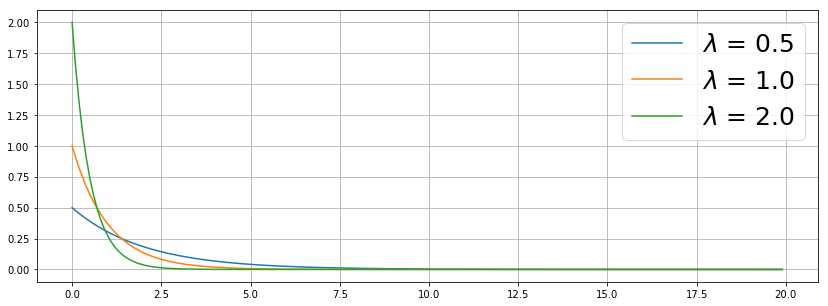

In [118]:
y_05= exp_dist(x, 0.5)
y_1 = exp_dist(x, 1.)
y_2 = exp_dist(x, 2.)
plt.figure(figsize=(14,5))
plt.plot(x,y_05, label=r"$\lambda$ = 0.5")
plt.plot(x,y_1, label=r"$\lambda$ = 1.0")
plt.plot(x,y_2, label=r"$\lambda$ = 2.0")
plt.grid()
plt.legend(fontsize=25)
plt.show()

In [119]:
def gauss(x, mean, sigma):
    a =  1./(np.sqrt(2*np.pi)*sigma)
    b = np.exp(-0.5*np.power(x-mean,2)/(np.power(sigma,2)))
    return a*b

In [120]:
def calc_mean(xdata, ydata):
    stepsize = xdata[1]-xdata[0]
    mean = 0.
    area = 0.
    for i in range(1,len(xdata)):
        mean += (xdata[i]-0.5*stepsize)*ydata[i]  # use midpoints of interval
        area += abs(ydata[i])
    return mean/area

def calc_std(xdata, ydata, mean):
    stepsize = xdata[1]-xdata[0]
    std = 0.
    area = 0.
    for i in range(0,len(xdata)):
        std += (xdata[i]-0.5*stepsize-mean)**2*ydata[i]
        area += abs(ydata[i])
    return np.sqrt(std/area)

In [121]:
def rand(lam):
    return -np.log(random.random())/lam

In [122]:
n_exp = 1000
n = 100
lam = 0.01
means = []
for exp in range(0,n_exp):
    temp = []
    for i in range(0,n):
        temp.append(rand(lam))
    means.append(np.mean(temp))

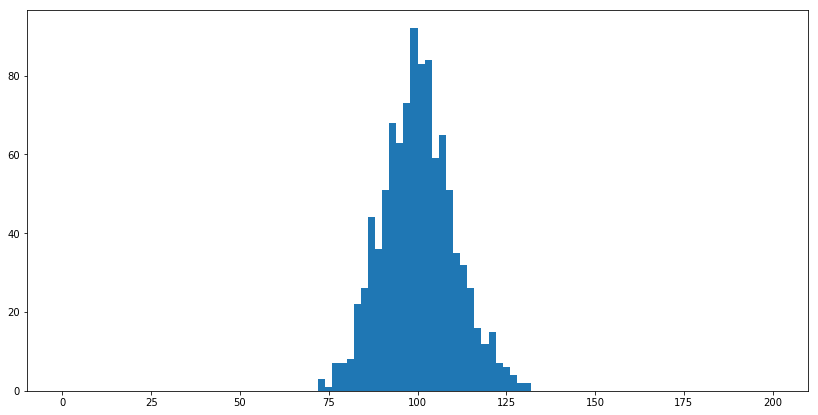

In [126]:
plt.figure(figsize=(14,7))
weights, bins, patches = plt.hist(means, bins=100, range=(0.,200.))
plt.show()
stepsize = 200./len(weights)
midpoints = np.linspace(0.+0.5*stepsize, 200.00-0.5*stepsize,  len(weights))

In [127]:
calculated_mean =  calc_mean(midpoints, weights)
print("calculated mean  = %.3f" % calculated_mean)
calculated_sigma = calc_std(midpoints, weights, calculated_mean)
print("calculated sigma = %.3f" % calculated_sigma)

calculated mean  = 99.230
calculated sigma = 10.044


In [125]:
theoretical_mean = 1./lam
theoretical_sigma = theoretical_mean/np.sqrt(n)
print("theoretical mean  = %.3f" % theoretical_mean)
print("theoretical sigma = %.3f" % theoretical_sigma)

theoretical mean  = 100.000
theoretical sigma = 10.000


In [131]:
n_exp = 10000
lams = [0.2, 0.05, 0.01]
n_arr = [50, 200, 1000]
means = []
for i in range(0,(len(lams)*len(n_arr))):
    means.append([])
calculated_means = np.zeros(9)
calculated_sigmas = np.zeros(9)
theoretical_means = np.zeros(9)
theoretical_sigmas = np.zeros(9)

In [132]:
for (li,l) in enumerate(lams):
    for (ni,n) in enumerate(n_arr):
        theoretical_means[li*3+ni]=(1./l)
        theoretical_sigmas[li*3+ni]=(1./l/np.sqrt(n))
        means_temp = []
        for exp in range(0,n_exp):
            temp = []
            for i in range(0,n):
                temp.append(rand(l))
            means_temp.append(np.mean(temp))
        means[li*3+ni]=means_temp

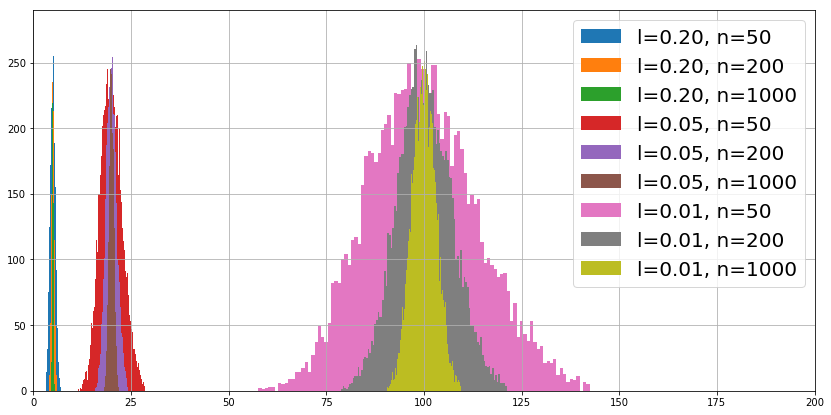

In [133]:
plt.figure(figsize=(14,7))
for (li,l) in enumerate(lams):
    for (ni,n) in enumerate(n_arr):
        hist_range = (theoretical_means[li*3+ni]-3*theoretical_sigmas[li*3+ni],theoretical_means[li*3+ni]+3*theoretical_sigmas[li*3+ni])
        weights, bins, patches = plt.hist(means[li*3+ni], bins=100, range=hist_range,label="l=%.2f, n=%d" % (l, n))
        stepsize = (6*theoretical_sigmas[li*3+ni]/len(weights))
        midpoints = np.linspace(hist_range[0]+0.5*stepsize, hist_range[1]-0.5*stepsize,  len(weights))
        calculated_means[li*3+ni]=calc_mean(midpoints, weights)
        calculated_sigmas[li*3+ni]=calc_std(midpoints, weights, calculated_means[li*3+ni])
plt.xlim(0,200)
# plt.yscale("log")
plt.grid()
plt.legend(fontsize=20)
plt.show()

In [15]:
print("l\tn\ttheo_mean\texp_mean\ttheo_sigma\texp_sigma")
for (li,l) in enumerate(lams):
    for (ni,n) in enumerate(n_arr):
        print("%.2f\t%d\t%.2f\t\t%.2f\t\t%.2f\t\t%.2f" % (l,n,theoretical_means[li*3+ni],calculated_means[li*3+ni],theoretical_sigmas[li*3+ni],calculated_sigmas[li*3+ni]) )

l	n	theo_mean	exp_mean	theo_sigma	exp_sigma
0.20	50	5.00		4.97		0.71		0.69
0.20	200	5.00		5.00		0.35		0.35
0.20	1000	5.00		4.99		0.16		0.15
0.05	50	20.00		19.97		2.83		2.80
0.05	200	20.00		19.97		1.41		1.34
0.05	1000	20.00		20.00		0.63		0.62
0.01	50	100.00		99.38		14.14		13.97
0.01	200	100.00		99.91		7.07		7.09
0.01	1000	100.00		99.94		3.16		3.08


# Cauchy distribution

b) Now try out the CLT for the Cauchy distribution:

$f(x) = \dfrac{1}{\pi\gamma}\dfrac{\gamma^2}{(x-x_0)^2+\gamma^2}$

Argue why the CLT is not expected to hold for the Cauchy distribution. You can generate random nombers from the Cauchy distribution by setting

$x = \gamma\tan(\pi U-\pi/2)+x_0$.

Try $x_0=25$ and $\gamma=3$ and plot the distribution for x. Now take $n=100$ samples and plot the distribution of the mean. Discuss the results. 

In [16]:
def cauchy(x, mean, width):
    nominator = width/np.pi
    denominator = np.power(x-mean,2)+np.power(width,2)
    return nominator/denominator

def cauchy_rand(mean, width):
    x = width*np.tan(np.pi*random.random() - np.pi/2.)+mean
    return x

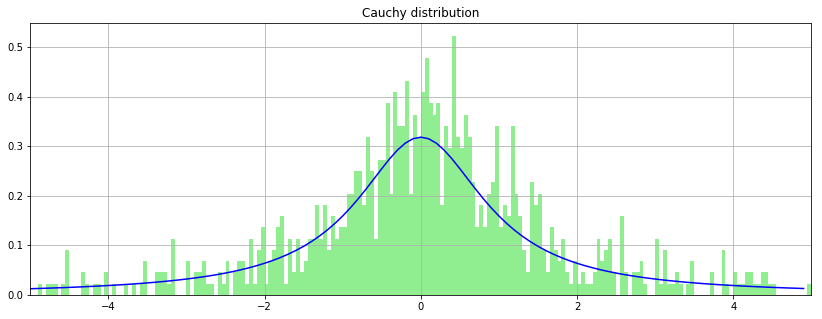

In [43]:
mean = 0.
width = 1.
n_samples = 1000

# cauchy function
x_array = np.arange(mean-5*width,mean+5*width, 0.1)
cauchy_array = cauchy(x_array, mean, width)

# random generated cauchy distribution
random_cauchy_array = []
for i in range(0, n_samples):
    random_cauchy_array.append(cauchy_rand(mean, width))

# plot
plt.clf()
plt.figure(figsize=(14,5))
weights, bins, patches = plt.hist(random_cauchy_array, color="lightgreen",range=(mean-5*width,mean+5*width),bins=200, normed=True  )
plt.plot(x_array, cauchy_array, color="blue")
plt.xlim(mean-5*width,mean+5*width)
plt.grid()
plt.title("Cauchy distribution")
plt.show()

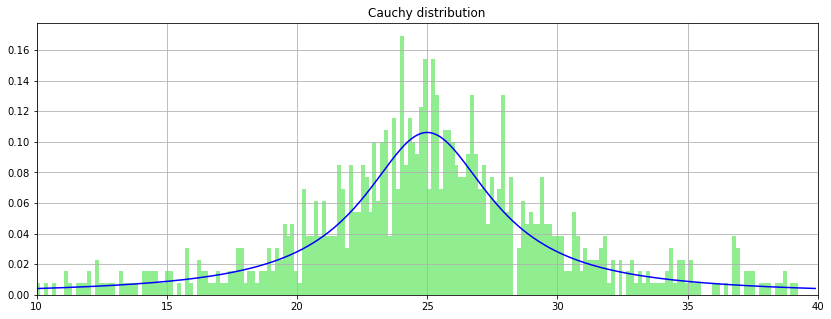

In [45]:
mean = 25.
width = 3.
n_samples = 1000

# cauchy function
x_array = np.arange(mean-5*width,mean+5*width, 0.1)
cauchy_array = cauchy(x_array, mean, width)

# random generated cauchy distribution
random_cauchy_array = []
for i in range(0, n_samples):
    random_cauchy_array.append(cauchy_rand(mean, width))

# plot
plt.clf()
plt.figure(figsize=(14,5))
weights, bins, patches = plt.hist(random_cauchy_array, color="lightgreen",range=(mean-5*width,mean+5*width),bins=200, normed=True  )
plt.plot(x_array, cauchy_array, color="blue")
plt.xlim(mean-5*width,mean+5*width)
plt.grid()
plt.title("Cauchy distribution")
plt.show()

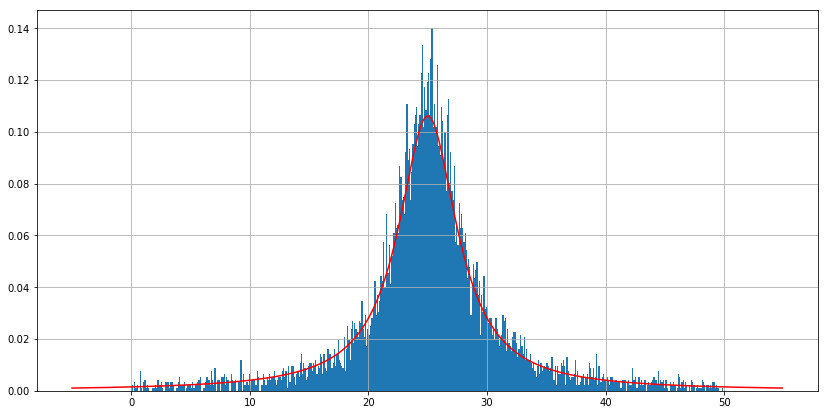

In [113]:
mean = 25.
width = 3.
n_samples = 100
n_exp = 10000
means = []
for exp in range(0,n_exp):
    temp = []
    for sample in range(0,n_samples):
        temp.append(cauchy_rand(mean,width))
    means.append(np.mean(temp))
plt.figure(figsize=(14,7))
hist_range = (0.,50.)
weights, bins, patches = plt.hist(means, bins=500, range=hist_range, normed=True)
plt.grid()
x_array = np.arange(mean-10.*width,mean+10.*width, 0.1)
y_cauchy = cauchy(x_array, mean, width)
plt.plot(x_array, y_cauchy, color="red", lw=1.5)
plt.show()
stepsize = (hist_range[1]-hist_range[0])/len(weights)
midpoints = np.linspace(hist_range[0]+0.5*stepsize, hist_range[1]-0.5*stepsize,  len(weights))

# Cauchy distribution has no expectation value $E[x]$

The integral $\int\limits_{-\infty}^{\infty}\dfrac{x}{x^2+\gamma^2}\textrm{d}x$ does not converge.